In [2]:
# データ加工、処理、分析ライブラリ
import numpy as np
import numpy.random as random
import scipy as sp
from pandas import Series, DataFrame
import pandas as pd

# 可視化ライブラリ
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

# 機械学習用ライブラリ
import sklearn

%precision 3

'%.3f'

In [3]:
import requests, zipfile
import io

# 自動車価格データを取得
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data'
res = requests.get(url).content

# 取得データをDataFrameオブジェクトとして読み込み
auto = pd.read_csv(io.StringIO(res.decode('utf-8')), header=None)
# データの列にラベルを設定
auto.columns = ['symboling','normalized-losses','make','fuel-type','aspiration','num-of-doors','body-style','drive-wheels','engine-location','wheel-base',
                'length','width','height','curb-weight','engine-type','num-of-cylinders','engine-size','fuel-system','bore','stroke','compression-ratio',
                'horsepower','peak-rpm','city-mpg','highway-mpg','price']

In [4]:
print('自動車データの形式:{}'.format(auto.shape))

自動車データの形式:(205, 26)


In [5]:
auto.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [6]:
auto = auto[['price','horsepower','width','height']]
auto.isin(['?']).sum()

price         4
horsepower    2
width         0
height        0
dtype: int64

In [7]:
auto = auto.replace('?', np.nan).dropna()
print('自動車データの形式:{}'.format(auto.shape))

自動車データの形式:(199, 4)


In [8]:
print('データ型の確認(方変更前) \n{}'.format(auto.dtypes))

データ型の確認(方変更前) 
price          object
horsepower     object
width         float64
height        float64
dtype: object


In [9]:
auto = auto.assign(price=pd.to_numeric(auto.price))
auto = auto.assign(horsepower=pd.to_numeric(auto.horsepower))
print('データ型の確認(方変更前) \n{}'.format(auto.dtypes))


データ型の確認(方変更前) 
price           int64
horsepower      int64
width         float64
height        float64
dtype: object


In [10]:
auto.corr()

,price,horsepower,width,height
price,1.000000,0.810533,0.753871,0.134990
horsepower,0.810533,1.000000,0.615315,-0.087407
width,0.753871,0.615315,1.000000,0.309223
height,0.134990,-0.087407,0.309223,1.000000


In [11]:
# データ分割(訓練データとテストデータ)のためのインポート
from sklearn.model_selection import train_test_split

# 重回帰のモデル構築のためのインポート
from sklearn.linear_model import LinearRegression

# 目的変数にpriceを指定、説明変数にそれ以外を指定
X = auto.drop('price', axis=1)
y = auto['price']

# 訓練データとテストデータに分ける
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

# 重回帰クラスの初期化と学習
model = LinearRegression()
model.fit(X_train, y_train)

# 決定係数を表示
print('決定係数(train):{:.3f}'.format(model.score(X_train,y_train)))
print('決定係数(test):{:.3f}'.format(model.score(X_test,y_test)))

# 回帰係数と切片を表示
print('\n回帰係数\n{}'.format(pd.Series(model.coef_, index=X.columns)))
print('切片: {:.3f}'.format(model.intercept_))

決定係数(train):0.733
決定係数(test):0.737

回帰係数
horsepower      81.651078
width         1829.174506
height         229.510077
dtype: float64
切片: -128409.046


In [12]:
auto = auto[['price','width','engine-size']]
auto.isin(['?']).sum()

KeyError: "['engine-size'] not in index"

In [ ]:
auto = auto.replace('?', np.nan).dropna()
auto

In [ ]:
auto.dtypes

In [ ]:
auto = auto.assign(price=pd.to_numeric(auto.price))
auto.dtypes

In [ ]:
X = auto.drop('price', axis=1)
y = auto.price
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.5, random_state=0)

model = LinearRegression()
model.fit(X_train, y_train)

print('決定係数(train):{:.3f}'.format(model.score(X_train, y_train)))
print('決定係数(test):{:.3f}'.format(model.score(X_test, y_test)))

print('\n回帰係数\n{}'.format(pd.Series(model.coef_, index=X.columns)))
print('切片: {:/3f}'.formt(model.intercept_))

In [ ]:
# データを取得
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'
res = requests.get(url).content

# 取得したデータをデータフレームオブジェクトとして読み込み
adult = pd.read_csv(io.StringIO(res.decode('utf-8')), header=None)

# データの列にラベルを設定
adult.columns =['age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship','race','sex','capital-gain',
                'capital-loss','hours-per-week', 'native-country','flg-50K']

# データの形式と欠損数を出力
print('データの形式:{}'.format(adult.shape))
print('欠損数の数:{}'.format(adult.isnull().sum().sum()))

# データの先頭5行を出力
adult.head()


In [ ]:
adult.groupby('flg-50K').size()

In [ ]:
# 「fin_fig」カラムを追加し、もし「flg-50K」カラムの値が「>50K」だったら1、そうでなければ0をセットする
adult['fin_flg'] = adult['flg-50K'].map(lambda x: 1 if x == ' >50K' else 0)
adult.groupby('fin_flg').size()

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# 説明変数と目的変数の設定
X = adult[['age','fnlwgt','education-num','capital-gain','capital-loss']]
y = adult['fin_flg']

# 訓練データとテストデータに分ける
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.5, random_state=0)

# ロジスティック回帰クラスの初期化と学習
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

print('正解率(train):{:.5f}'.format(model.score(X_train, y_train)))
print('正解率(test):{:.5f}'.format(model.score(X_test, y_test)))

In [ ]:
model.coef_

In [ ]:
np.exp(model.coef_)

In [35]:
# 標準化のためのクラスをインポート
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Xとyを設定
X = adult[['age','fnlwgt','education-num','capital-gain','capital-loss']]
y = adult['fin_flg']

# 訓練データとテストデータに分ける
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

# 標準化処理
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

#ロジスティック回帰クラスの初期化と学習
model = LogisticRegression(max_iter=1000)
model.fit(X_train_std, y_train)

# 正解率の表示
print('正解率(train):{:.3f}'.format(model.score(X_train_std, y_train)))
print('正解率(test):{:.3f}'.format(model.score(X_test_std, y_test)))

NameError: name 'adult' is not defined

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)

model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)

print('正解率(train):{:.3f}'.format(model.score(X_train, y_train)))
print('正解率(test):{:.3f}'.format(model.score(X_test, y_test)))

In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

model = LogisticRegression()
model.fit(X_train_std, y_train)

print('正解率(train):{:.3f}'.format(model.score(X_train_std, y_train)))
print('正解率(test):{:.3f}'.format(model.score(X_test_std, y_test)))

In [ ]:
# リッジ回帰用のクラス
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split

# 訓練データとテストデータに分割
X = auto.drop('price', axis=1)
y = auto['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

# モデルの建築と評価
linear = LinearRegression()
ridge = Ridge(random_state=0)

for model in [linear, ridge]:
    model.fit(X_train, y_train)
    print('{}(train):{:.6f}'.format(model.__class__.__name__, model.score(X_train,y_train)))
    print('{}(test):{:.6f}'.format(model.__class__.__name__, model.score(X_test,y_test)))

In [ ]:
from sklearn.linear_model import LinearRegression, Lasso
X = auto.drop('price', axis=1)
y = auto.price
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)
models = {linear : LinearRegression(),
        lasso1 : Lasso(alpha=1.0, random_state=0),
        lasso2 : Lasso(alpha=200.0, random_state=0)
}
scores = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    scores[(model_name, 'train')] = model.score(X_train, y_train)
    scores[(model_name, 'test')] = model.score(X_train, y_train)
a = pd.Series(scores).unstack()
pd.DataFrame(a)

In [ ]:
# データを取得
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data'
res = requests.get(url).content

# 取得したデータをDataFrameオブジェクトとして読み込み
mushroom = pd.read_csv(io.StringIO(res.decode('utf-8')), header=None)

# データの列にラベルを設定
mushroom.columns = ['classes','cap_shape','cap_surface','cap_color','bruises','odor',
                    'gill_attachment','gill_spacing','gill_size','gill_color','stalk_shape',
                    'stalk_root','stalk_surface_above_ring','stalk_surface_below_ring',
                    'stalk_color_above_ring','stalk_color_below_ring','veil_type','veil_color',
                    'ring_number','ring_type','spore_print_color','population','habitat']

# 先頭5行
mushroom = pd.DataFrame(mushroom)
mushroom.head()

In [ ]:
print('データの形式:{}'.format(mushroom.shape))
print('欠損の数:{}'.format(mushroom.isnull().sum().sum()))

In [ ]:
mushroom_dummy = pd.get_dummies(mushroom[['gill_color', 'gill_attachment', 'odor', 'cap_color']]).astype(int)
mushroom_dummy.head()

In [ ]:
# 目的変数もフラグ化する
mushroom_dummy['flg'] = mushroom['classes'].map(lambda x : 1 if x == 'p' else 0)

In [ ]:
mushroom_dummy.groupby(['cap_color_c', 'flg'])['flg'].count().unstack()

In [ ]:
mushroom_dummy.groupby(['gill_color_b', 'flg'])['flg'].count().unstack()

In [ ]:
-(0.5 * np.log2(0.5) + 0.5 * np.log2(0.5))


In [ ]:
-(0.001 * np.log2(0.001) + 0.999 * np.log2(0.999))

In [ ]:
def calc_entropy(p):
    return - (p * np.log2(p) + (1 - p) * np.log2(1 - p))

In [ ]:
p = np.arange(0.001, 0.999, 0.01)

# グラフ化
plt.plot(p, calc_entropy(p))
plt.xlabel('prob')
plt.ylabel('entropy')
plt.grid(True)

In [ ]:
entropy_init = -(0.518 * np.log2(0.518) + 0.482 * np.log2(0.482))
print('毒キノコデータのエントロピーの初期値: {:.3f}'.format(entropy_init))

In [ ]:
mushroom_dummy.groupby(['cap_color_c', 'flg'])['flg'].count().unstack()

In [ ]:
# cap_colorがcでない場合のエントロピー
p1 = 4176 / (4176+3904)
p2 = 1 - p1
entropy_c0 = -(p1*np.log2(p1) + p2 * np.log2(p2))
print('entropy_c0: {:.3f}'.format(entropy_c0))

In [ ]:
# cap_colorがcである場合のエントロピー
p1 = 32 / (32+12)
p2 = 1 - p1
entropy_c1 = -(p1*np.log2(p1) + p2 * np.log2(p2))
print('entropy_c0: {:.3f}'.format(entropy_c1))

In [ ]:
entropy_after = (4176+3904)/8124*entropy_c0 + ((32+12)/8124*entropy_c1)
print('データ分割後のエントロピー: {:.3f}'.format(entropy_after))

In [ ]:
print('変数cap_colorの分割によって得られる情報利得: {:.3f}'.format(entropy_init - entropy_after))

In [ ]:
mushroom_dummy.groupby(['gill_color_b', 'flg'])['flg'].count().unstack()

In [ ]:
# gill_colorがbでない場合のエントロピー
p1 = 4208/(4208+2188)
p2 = 1 - p1
entropy_b0 = - (p1 * np.log2(p1) + p2 * np.log2(p2))

# gill_colorがbである場合のエントロピー
p1 = 0/(0+1728)
p2 = 1-p1
entropy_b1 = -(p2 * np.log2(p2))

entropy_after = (4208+2188)/8124*entropy_b0 + (0+1728)/8124*entropy_b1
print('変数gill_colorの分割によって得られる情報利得: {:.3f}'.format(entropy_init - entropy_after))

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# データ分割
X = mushroom_dummy.drop('flg',axis=1)
y = mushroom_dummy['flg']
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=0)

model = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=0)
model.fit(X_train, y_train)

print('正解率(train):{:.3f}'.format(model.score(X_train, y_train)))
print('正解率(test):{:.3f}'.format(model.score(X_test, y_test)))

In [ ]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify= cancer.target, random_state=66)
models = {
    'tree1': DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0),
    'tree2': DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=0),
    'tree3': DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=0),
    'tree4': DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0),
    'tree5': DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=0),
    'tree6': DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=0)
}
scores = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    scores[(model_name, 'train')] = model.score(X_train, y_train)
    scores[(model_name, 'test')] = model.score(X_test, y_test)
pd.Series(scores).unstack()


In [ ]:
# データやモデルを構築するためのライブラリなどのインポート
from sklearn.datasets import load_breast_cancer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# データセットの読み込み
cancer = load_breast_cancer()

# 訓練データとテストデータに分ける
# stratifyは階層化抽出
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=0)

# グラフ描画用のリストを用意
training_accuracy = []
test_accuracy = []

# 学習
for n_neighbors in range(1,21):
    model = KNeighborsClassifier(n_neighbors=n_neighbors)
    model.fit(X_train, y_train)
    training_accuracy.append(model.score(X_train, y_train))
    test_accuracy.append(model.score(X_test, y_test))

# グラフを描写
plt.plot(range(1,21), training_accuracy, label='Training')
plt.plot(range(1,21), test_accuracy, label='Test')
plt.ylabel('Accuracy')
plt.xlabel('n_neighbors')
plt.legend()


In [ ]:
X = mushroom_dummy.drop('flg', axis=1)
y = mushroom_dummy['flg']

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0)
training_accuracy = []
test_accuracy = []
for n in range(1,20):
    model = KNeighborsClassifier(n_neighbors=n)
    model.fit(X_train, y_train)
    training_accuracy.append(model.score(X_train, y_train))
    test_accuracy.append(model.score(X_test, y_test))
plt.plot(range(1,20), training_accuracy, label = 'Training')
plt.plot(range(1,20), test_accuracy, label = 'Test')
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.legend()

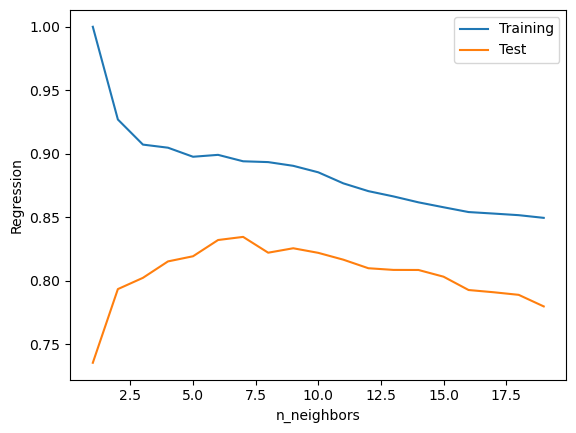

In [27]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split

student = pd.read_csv('student-mat.csv', sep = ';')
X = student.loc[:, ['age','Medu','Fedu','traveltime','studytime'
                    ,'failures','famrel','freetime','goout','Dalc','Walc','absences','G1','G2']].values
y = student['G3']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

training_regression = []
test_regression = []

for n in range(1, 20):
    model = KNeighborsRegressor(n_neighbors=n)
    model.fit(X_train, y_train)
    training_regression.append(model.score(X_train, y_train))
    test_regression.append(model.score(X_test, y_test))
plt.plot(range(1,20), training_regression, label = 'Training')
plt.plot(range(1, 20), test_regression, label = 'Test')
plt.xlabel('n_neighbors')
plt.ylabel('Regression')
plt.legend()

In [33]:
from sklearn.svm import LinearSVC
from sklearn.datasets import load_breast_cancer
#訓練データとテストデータに分けるライブラリ
from sklearn.model_selection import train_test_split

# データの読み込み
cancer = load_breast_cancer()

# 訓練データとテストデータに分ける
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify = cancer.target, random_state=0)

# クラスの初期化と学習
model = LinearSVC(random_state=0)
model.fit(X_train, y_train)

# 訓練データとテストデータのスコア
print('正解率(train):{:.3f}'.format(model.score(X_train, y_train)))
print('正解率(test):{:.3f}'.format(model.score(X_test, y_test)))

正解率(train):0.923
正解率(test):0.930


C:\Users\User\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [43]:
from sklearn.preprocessing import StandardScaler

# 標準化
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

# クラスの初期化と学習
model = LinearSVC(random_state=0, dual=True)
model.fit(X_train_std, y_train)

# 訓練データとテストデータのスコア
print('正解率(train):{:.3f}'.format(model.score(X_train_std, y_train)))
print('正解率(test):{:.3f}'.format(model.score(X_test_std, y_test)))

正解率(train):0.993
正解率(test):0.951


In [49]:
from sklearn.svm import SVC

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify = cancer.target, random_state=0)

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

model = SVC(kernel='rbf', random_state=0, C=2)
model.fit(X_train_std, y_train)

print('正解率(train):{:.3f}'.format(model.score(X_train_std, y_train)))
print('正解率(test):{:.3f}'.format(model.score(X_test_std, y_test)))

正解率(train):0.995
正解率(test):0.958


In [57]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)

model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3, random_state=0)
model.fit(X_train, y_train)


print('正解率(train):{:.3f}'.format(model.score(X_train, y_train)))
print('正解率(test):{:.3f}'.format(model.score(X_test, y_test)))

正解率(train):0.964
正解率(test):0.947
